In [8]:
pip install -q cdlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
from cdlib import algorithms
import networkx as nx

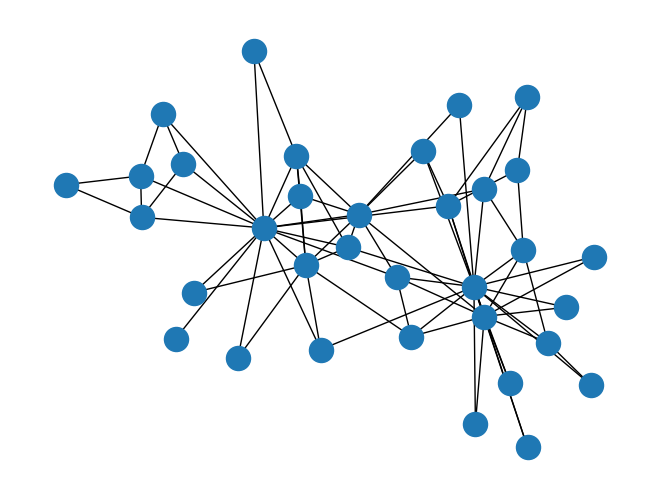

In [10]:
G = nx.karate_club_graph()
nx.draw(G)
#applies the Louvain algorithm to detect communities. The weight='weight' parameter specifies that edge weights should be considered, 
#resolution=1.0 sets the resolution parameter for modularity optimization, and randomize=False ensures deterministic results.
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)
print(coms)

In [11]:
# Extract the communities
communities = coms.communities

# Print the clusters
for i, community in enumerate(communities):
    print(f"Community {i}: {community}")

Community 0: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Community 1: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Community 2: [23, 24, 25, 27, 28, 31]
Community 3: [4, 5, 6, 10, 16]


In [12]:
print(communities)

[[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]]


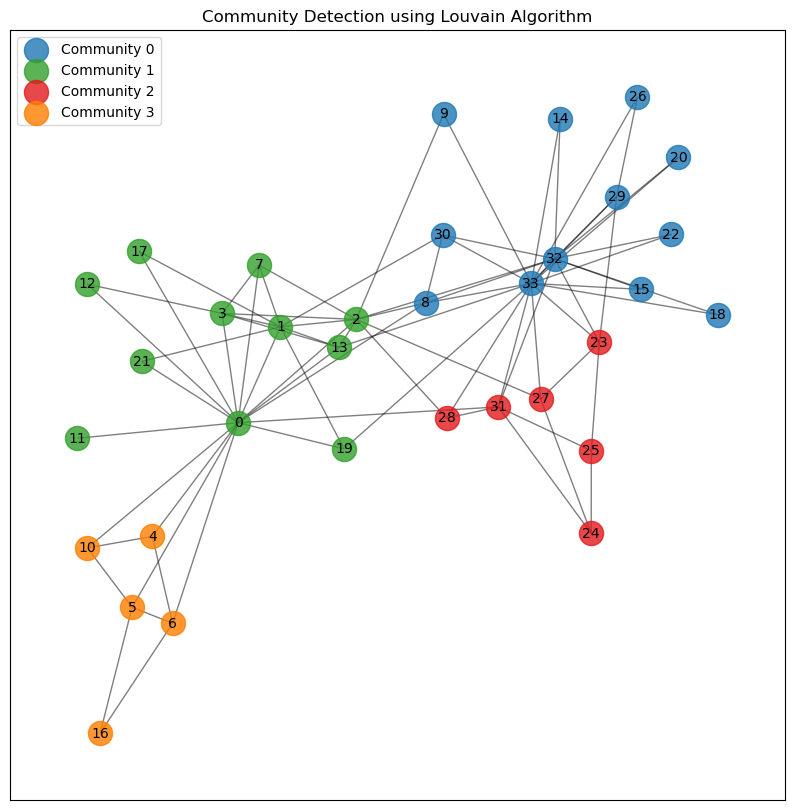

In [13]:
import matplotlib.pyplot as plt
# Create a color map for the communities
import itertools

#The itertools creates an iterator that cycles through a given sequence indefinitely.
colors = itertools.cycle(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f'])

# Create a dictionary to map nodes to their community colors
node_color_map = {}
for color, community in zip(colors, communities):
    for node in community:
        node_color_map[node] = color

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(10, 10))

# Draw nodes with community colors
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=color, node_size=300, alpha=0.8, label=f"Community {communities.index(community)}")

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Community Detection using Louvain Algorithm")
plt.legend()
plt.show()